In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import urllib.request
import time
from urllib.request import urlopen
import zipfile
import wget

import datetime as dt
from datetime import datetime
import zipfile 

import re
import seaborn as sns
import matplotlib.pyplot as plt

import statistics

from py7zr import unpack_7zarchive
import shutil

import os
from pyunpack import Archive
import zipfile

from lxml import etree
import lxml
from copy import deepcopy

In [2]:
def get_data():
    import zipfile
    import wget

    full_link = 'http://wwm.phy.bme.hu/LD/ld_en_wiki.zip'
    wget.download(full_link, "ld_en_file.zip")

    with zipfile.ZipFile('ld_en_file.zip',"r") as zip_ref:
        zip_ref.extractall("en_light_dump.txt")
    #file = open(r"en_light_dump.txt/en_wiki.txt", "r")
get_data()

KeyboardInterrupt: 

In [17]:
#download light dump data
headers = requests.utils.default_headers()
headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

url = 'http://wwm.phy.bme.hu/light.html'

opened = urlopen(url)

soup = BeautifulSoup(opened, 'lxml')
all_links = soup.findAll('a')

en_link = soup.findAll('a')[4]
#print(en_link)
link = en_link.get("href")

full_link = url+link
#print(full_link)
#full_link2 = 'http://wwm.phy.bme.hu/LD/ld_en_wiki.zip'
#full_link2
right_link = 'http://wwm.phy.bme.hu/LD/ld_en_wiki.zip'

In [18]:
wget.download(right_link, "en_file.zip")

import zipfile
with zipfile.ZipFile("en_file.zip", "r") as zip_ref:
    zip_ref.extractall("light_dump_en_txt")

In [19]:
#download light dump data
headers = requests.utils.default_headers()
headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

url = 'http://wwm.phy.bme.hu/light.html'

opened = urlopen(url)

soup = BeautifulSoup(opened, 'lxml')
all_links = soup.findAll('a')
all_links

[<a href="index.html"><font size="4">Return Home</font></a>,
 <a href="./LD/ld_ar_wiki.zip">ar</a>,
 <a href="./LD/ld_cs_wiki.zip">cs</a>,
 <a href="./LD/ld_de_wiki.zip">de</a>,
 <a href="./LD/ld_en_wiki.zip">en</a>,
 <a href="./LD/ld_es_wiki.zip">es</a>,
 <a href="./LD/ld_fa_wiki.zip">fa</a>,
 <a href="./LD/ld_fr_wiki.zip">fr</a>,
 <a href="./LD/ld_he_wiki.zip">he</a>,
 <a href="./LD/ld_hu_wiki.zip">hu</a>,
 <a href="./LD/ld_ja_wiki.zip">ja</a>,
 <a href="./LD/ld_pt_wiki.zip">pt</a>,
 <a href="./LD/ld_simple_wiki.zip">simple</a>,
 <a href="./LD/ld_ro_wiki.zip">ro</a>,
 <a href="./LD/ld_zh_wiki.zip">zh</a>,
 <a href="LD/ld_all.zip">all</a>]

In [20]:
en_link = soup.findAll('a')[4]
#print(en_link)
link = en_link.get("href")
link

'./LD/ld_en_wiki.zip'

## Descriptive Stats 

In [7]:
def get_edit_num(file):
    edit_num = {}
    art = file.readline()
    ct = 0

    for i in file:
        if i[0] != "^":
            edit_num[art.rstrip()] = ct
            art = i
            ct = 0
        else:
            ct +=1

    edit_num[art] = ct
    return edit_num

In [8]:
edit_num = get_edit_num(open("en_light_dump.txt/en_wiki.txt", "r"))

In [9]:
edit_num

{'Blackboard': 2,
 'Coimbatore_tile_company': 2,
 'The_moonstone_2': 2,
 'African_Hunting_Wasps': 2,
 'Morgan_Sheardown': 2,
 'Hymenocaris': 2,
 'Erica_barstein': 2,
 'Ben_clarke': 4,
 'British_association_for_cognitive_and_behavioural_psychotherapies': 2,
 'Ocportal': 3,
 'British_Association_for_Cognitive_and_Behavioural_Psychotherapies': 2,
 'Onemorelevel': 2,
 'Flake_ice_machine': 2,
 'Andre_Andrade': 2,
 'Andrew_K_Skinner': 4,
 'Lock_thief': 3,
 'Enrico_Scarampi': 2,
 'Perfect_Week': 2,
 'Alexander_Grant_Ruthven': 3,
 'Number_Theory_-The_Queen_of_Mathematics': 2,
 'Bangi-Ntomba_languages': 3,
 'CCText': 7,
 'Hydroxy-1,4-benzoquinone': 2,
 'Creek_Freedmen': 3,
 'Parks_and_recreations_season_2': 2,
 'Danny_christie': 2,
 'Mai_Xa': 2,
 'Shahid_kapoor_and_amrita_rao': 3,
 'Soren': 2,
 'Ahoora': 2,
 "Ali_al-Uraidhi_ibn_Ja'far_al-Sadiq": 14,
 'Jouhet_i_France': 2,
 'Nutrinit': 2,
 '2,5-dihydroxy-1,4-benzoquinone': 3,
 'Chilldrin_of_da_Ghetto_(album)': 2,
 '2,5-Dihydroxy-1,4-benzoquinone

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


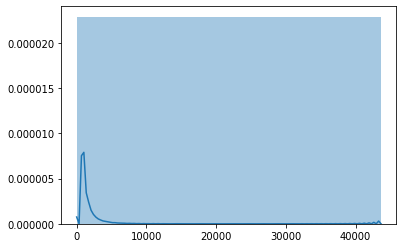

In [10]:
#plot distribution of edit amts
edit_vals = list(edit_num.values())
edit_vals_hist = sns.distplot(edit_vals, bins = 1)
edit_vals_hist

In [11]:
num_edits_mean = statistics.mean(edit_vals)
num_edits_mean

47.33549788536329

In [48]:
def get_top_10(wiki_dict):
    wiki_dict2 = sorted(wiki_dict.items(), key = lambda x: x[1], reverse = True)
    df = pd.DataFrame(wiki_dict2[:11])
    df.rename(columns={0: "Article", 1: "Edit Count"}, inplace = True)
    return df
def get_bottom_10(wiki_dict):
    wiki_dict2 = sorted(wiki_dict.items(), key = lambda x: x[1])
    df = pd.DataFrame(wiki_dict2[:11])
    df.rename(columns={0: "Article", 1: "Edit Count"}, inplace = True)
    return df

In [49]:
get_bottom_10(edit_num)

,Article,Edit Count
0,Welling_(disambiguation),0
1,[[it:Depressione (maZ 0 8,0
2,[[id:Depresi]],0
3,[[hr:Klinička depresija]],0
4,[[ko:우울증]],0
5,[[fr:Dépression (médecine)]],0
6,[[eo:Deprimo]],0
7,[[es:Depresión]],0
8,[[el:Μείζων καταθλιπτική διαταραχή]],0
9,[[et:Depressioon]],0


In [47]:
#get_top_10(edit_num)

,Article,Edit Count
0,George_W._Bush,43650
1,List_of_World_Wrestling_Entertainment_employees,30572
2,Wikipedia,29726
3,United_States,27433
4,Michael_Jackson,23243
5,Jesus,21768
6,Deaths_in_2009,20814
7,Wii,20225
8,Adolf_Hitler,20093
9,Britney_Spears,19833


In [49]:
top10least = pd.DataFrame(j[:11])
top10least.rename(columns={0: "Article", 1: "Edit Count"},
                     inplace=True)
top10least

,article,Edit Count
0,Welling_(disambiguation),0
1,[[it:Depressione (maZ 0 8,0
2,[[id:Depresi]],0
3,[[hr:Klinička depresija]],0
4,[[ko:우울증]],0
5,[[fr:Dépression (médecine)]],0
6,[[eo:Deprimo]],0
7,[[es:Depresión]],0
8,[[el:Μείζων καταθλιπτική διαταραχή]],0
9,[[et:Depressioon]],0


In [50]:
k = get_top_10(edit_num)
top10most = pd.DataFrame(k[:11])
top10most.rename(columns={0: "Article", 1: "Edit Count"},
                     inplace=True)
top10most

,Article,Edit Count
0,George_W._Bush,43650
1,List_of_World_Wrestling_Entertainment_employees,30572
2,Wikipedia,29726
3,United_States,27433
4,Michael_Jackson,23243
5,Jesus,21768
6,Deaths_in_2009,20814
7,Wii,20225
8,Adolf_Hitler,20093
9,Britney_Spears,19833


## Get M stat 

In [3]:
def get_pairs(tup_pairs):
    if len(tup_pairs) == 0:
        return {}
    
    mut_revs = {}
    checked = []
    
    for i in tup_pairs:
        if i in checked:
            continue
        if (i[1], i[0]) in checked:
            continue
        checked.append(i)
        
        for mut_revs in tup_pairs:
            if tup_pairs == (i[1], i[0]):
                if i in mut_revs:
                    mut_revs[i] = mut_revs[i] + 1
                else:
                    mut_revs[i] = 1
                    
    return mut_revs

def get_M_perArt(revs, mut_amt, edit_num):
    if len(revs) == 0:
        return 0
    
    total = 0
    for i in revs:
        total = total+min(edit_num[i[0]], edit_num[i[1]])
    
    final = (len(mut_amt) * total)
    
    return final

def dicts_of_genInfo(e):
    edit_num = {}
    editor_name = {}
    
    for i in sorted(e.keys(), reverse = True):
        time = e[i][0]
        if e[i][2] != "":
            revert = int(e[i][1])
        else:
            continue
        if e[i][2] != "":
            version = int(e[i][2])
        else:
            continue
        #revert = int(e[i][1])
        #version = int(e[i][2])
        editor = e[i][3]
        
        if editor in edit_num:
            edit_num[editor] = edit_num[editor] +1
        else:
            edit_num[editor] = 1

        if revert == 0:
            editor_name[version] = editor
    return edit_num, editor_name

In [6]:
def get_m_stat(e, m_val): 
    topic = e["title"]
    del e["title"]
    edit_num, editor = dicts_of_genInfo(e)
    
    t = []
    
    for i in sorted(e.keys(), reverse = True):
        time = e[i][0]
        if e[i][2] != "":
            revert = int(e[i][1])
        else:
            continue
        if e[i][2] != "":
            version = int(e[i][2])
        else:
            continue
        #revert = int(e[i][1])
        #version = int(e[i][2])
        editor_name = e[i][3]
        
        if revert == 1:
            try:
                rival = editor[version+1]
                t.append((editor_name, rival))
            except:
                continue

    mut_pairs_amt = get_pairs(t)
    m_val = get_M_perArt(t, mut_pairs_amt, edit_num)
    
    return m_val 


def final_M_stat():
    file = open("en_light_dump.txt/en_wiki.txt", "r")
    #file = open(r"en_light_dump.txt/en_wiki.txt", "r")
    get_each_(file)
    
def get_each_M(file):
    m_holder = {}
    
    title_dict = {}
    title_dict["title"] = file.readline()
    
    num_edit = 0
    for i in file:
        if i[0] != "^":
            new_title = title_dict.copy()
            m_val = get_m_stat(new_title, m_holder)
            m_holder[title_dict["title"]] = m_val
            
            #print(new_topic)
            #print("~~~")
            
            title_dict = {}
            title_dict["title"] = i
            edit_num = 0
        else: 
            title_dict[num_edit] = i.split(" ")
        
        num_edit = num_edit +1 
        
    new_title = title_dict.copy()
    m_val = get_m_stat(new_title, m_holder)
    m_holder[title_dict["title"]] = m_val
    
#     print("Top 10:")
#     print(get_top_10(m_holder))
    
#     print("Bottom 10:")
#     print(get_bottom_10(m_holder))
    
    #print("Top Ten:")
    #[print("topic: ",k, " m statistic: ", v) for k, v in sorted(m_holder.items(), key=lambda x: x[1], reverse=True)[:11]]
    print("\nBottom Ten:")
    [print("topic: ",k, " m value: ", v) for k, v in sorted(m_holder.items(), key=lambda x: x[1], reverse = True)[-10:]]
    
    file.close()

In [5]:
final_M_stat()

Top Ten:
topic:  Chevrolet_Vega   
  m statistic:  2650352
topic:  Goan_Catholics   
  m statistic:  1503698
topic:  Neurofunk   
  m statistic:  733164
topic:  FC_Singen_04   
  m statistic:  676478
topic:  Michael_Jackson   
  m statistic:  533290
topic:  List_of_World_Wrestling_Entertainment_employees   
  m statistic:  515480
topic:  Voodoo_(D'Angelo_album)   
  m statistic:  441798
topic:  Anarchism   
  m statistic:  432828
topic:  Ozark_Jubilee   
  m statistic:  430898
topic:  Catholic_Church   
  m statistic:  342206
topic:  List_of_Barney_&_Friends_episodes_and_videos   
  m statistic:  324980


In [7]:
final_M_stat()


Bottom Ten:
topic:  AlbaniaPeople   
  m value:  0
topic:  AlbaniaHistory   
  m value:  0
topic:  AmoeboidTaxa   
  m value:  0
topic:  AssistiveTechnology   
  m value:  0
topic:  AfghanistanTransnationalIssues   
  m value:  0
topic:  AfghanistanMilitary   
  m value:  0
topic:  AfghanistanCommunications   
  m value:  0
topic:  AfghanistanPeople   
  m value:  0
topic:  AfghanistanGeography   
  m value:  0
topic:  AfghanistanHistory   
  m value:  0


In [10]:
final_M_stat()

Top Ten:
topic:  List_of_World_Wrestling_Entertainment_employees   
  m statistic:  87373860
topic:  Michael_Jackson   
  m statistic:  49862615
topic:  Anarchism   
  m statistic:  33760584
topic:  George_W._Bush   
  m statistic:  32263428
topic:  Neurofunk   
  m statistic:  22728084
topic:  Muhammad   
  m statistic:  18140598
topic:  Catholic_Church   
  m statistic:  17794712
topic:  Global_warming   
  m statistic:  16442440
topic:  Real_Madrid_C.F.   
  m statistic:  15733025
topic:  Barack_Obama   
  m statistic:  14544492
topic:  United_States   
  m statistic:  13853504


In [65]:
final_M_stat()


Bottom Ten:
topic:  AlbaniaHistory   
  m value:  0
topic:  AmoeboidTaxa   
  m value:  0
topic:  AssistiveTechnology   
  m value:  0
topic:  AfghanistanTransnationalIssues   
  m value:  0
topic:  AfghanistanMilitary   
  m value:  0
topic:  AfghanistanTransportations   
  m value:  0
topic:  AfghanistanCommunications   
  m value:  0
topic:  AfghanistanPeople   
  m value:  0
topic:  AfghanistanGeography   
  m value:  0
topic:  AfghanistanHistory   
  m value:  0


In [67]:
#for top 10
final_M_stat()

Top Ten:
topic:  List_of_World_Wrestling_Entertainment_employees   
  m statistic:  87373860
topic:  Michael_Jackson   
  m statistic:  49862615
topic:  Anarchism   
  m statistic:  33760584
topic:  George_W._Bush   
  m statistic:  32263428
topic:  Neurofunk   
  m statistic:  22728084
topic:  Muhammad   
  m statistic:  18140598
topic:  Catholic_Church   
  m statistic:  17794712
topic:  Global_warming   
  m statistic:  16442440
topic:  Real_Madrid_C.F.   
  m statistic:  15733025
topic:  Barack_Obama   
  m statistic:  14544492
